<a href="https://colab.research.google.com/github/mosfet-sudo/ML-Project-G75/blob/main/90049_A2_G75_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COMP90049 (IML) → A2 GROUP 75 PROJECT CODE**


---


Elijah Cullinan, 1352251, ecullinan@student.unimelb.edu.au

Amelia King, 1175861, kingal@student.unimelb.edu.au

Xinyu Xu, 1508869, xinyu11@student.unimelb.edu.au


---



*   Linked to (public) GitHub *mosfet-sudo/ML-Project-G75*
    * *Note → GitHub must be public in order for us to view the 'live updates' of any changes made, as well as to more easily do common File I/O operations*
*   List item


---



## Reading appropriate files into this Notebook
In order for this shared notebook to work, files must be shared & filepaths must be generic to that file sharing method. There are two options for this; option 1 should be the main method, use option2 if option 1 doesn't work for whatever reason.

Code blocks will need to be adjusted according to whatever method being used (wherever the files are being read from as well as where output files are saved), and both the repository&drive must be updated so that they reflect all the changes.

### Option 1: Read directly from *mosfet-sudo/ML-Project-G75*
Run the appropriate code block below for the Colab notebook to read files directly from the

### Option 2: Mount Google Drive

Run the appropriate code block below to mount your google drive to this colab notebook for however long you need to be running the code for.

*NOTE: You must accept Amelia's invitation to share the drive folder 'IML_G75_Colab_Notebooks in order for this to work as intended.*


In [ ]:
# OPTION 1: READ FROM GITHUB
!git clone https://github.com/mosfet-sudo/ML-Project-G75



fatal: destination path 'ML-Project-G75' already exists and is not an empty directory.


In [ ]:
# OPTION 2: MOUNT GOOGLE DRIVE
from google.colab import drive # To read in data from google drive (delete later?)
drive.mount('/content/drive') # to read in data from google drive (delete later?)

# ------
# '/content/drive/My Drive/IML_G75_Colab_Notebooks/...'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/IML_G75_Colab_Notebooks/


 CMaps_NASA
'COMP90049 G75 RESEARCH PROJECT NOTES.gdoc'
'IML_G75_Copy_(EMPTY).ipynb'
 METROPT3_AVGMINUTEPROCESSED.csv
 METROPT3_AVGMINUTEPROCESSED_WITHTIMES.csv
 NASAprocessed.csv
 pdm_2020.csv


## **Simple Data Processing**
*Elijah*

Each Dataset was checked for duplicate entries, and then specific numeric values were normalized. In addition to this there was some minor text processing of the NASA dataset where the text files were tranferred into csv format. Furthermore adjustments were made to the metrodataset where all data points of each minute were averaged in order to make the dataset smaller. In particular for values that were binary (i.e) 1 or 0 if the average was strictly greater than 0.5 then it was set to 1 otherwise it was set to 0. This averaging should reduce noise and reduce the affect of anomalous outliers.

### Metro-PT3
The raw data file is very large; seeing as Elijah has already completed the simple pre-processing it would be advisable not to run this code block again.

In [ ]:
import pandas as pd
import numpy as np
import json

""" Averaging function for new dataset that preserves when errors occur, n must
be even n=6 for averaging every minute. Takes the data frame, the number of
samples to bunch together and average and the indexes that are we are applying
the average of. The inputs are the data frame, an integer n, and 2 arrays of
numeric indexes. Returns the new (smaller) averaged dataframe. """
# above copied from below documentation; will need to be cleaned up bc half those sentences don't make no sense

## averaging function for new dataset that preserves when errors occur, n must be even n=6 for averaging every minute
## takes the data  frame the number of samples to bunch together and average and the indexes that are we are applying the averaging off.
## the inputs are the data frame, an integer n, and 2 arrays of numeric indexes it returns the new (smaller) averaged dataframe

def timeAvg(df, n, tempindexes, elec_temp_indexes):
    m = n/2
    m = int(m)

    df_empty = df.copy(deep=True).iloc[0:0]
    avg_atpoints = []
    max_atpoints = []
    for i in tempindexes:
        print(i)
        avg_atpoints = []
        temp_series = df.iloc[:,i]
        numrows = int(temp_series.shape[0])
        for j in range(m, int(numrows-m),n):
            avg_atpoints.append(temp_series.iloc[j-m:j+m].mean()) #here we take the average
        df_empty.iloc[:,i] = avg_atpoints
    for i in elec_temp_indexes:
        print(i)
        max_atpoints = []
        temp_series = df.iloc[:,i]
        numrows = int(temp_series.shape[0])
        for j in range(m, int(numrows-m),n):
            avg = temp_series.iloc[j-m:j+m].mean()  #we use the average to decide what to assign to this datapoint
            if avg > 0.5:
                max_atpoints.append(1)
            else:
                max_atpoints.append(0)
        df_empty.iloc[:,i] = max_atpoints
    df_empty.iloc[:,0] = list(range(1,df_empty.shape[0]+1))
    return df_empty


# df = pd.read_csv("C:/Users/ej/PycharmProjects/Assignment2/.venv/Scripts/MetroPT3(AirCompressor).csv") -> DELETE (Elijah)
# df = pd.read_csv('') # OPTION1: GITHUB
df = pd.read_csv('/content/drive/My Drive/IML_G75_Colab_Notebooks/') # OPTION2: GOOGLE DRIVE



#Duplicate checking
df = df.drop(columns = ["timestamp"])
num_columns = df.shape[1]
num_rows = df.shape[0]
duplicateddf=df.duplicated()
no_duplicate_df = df.loc[duplicateddf==False]


no_duplicate_df.rename(columns={"Unnamed: 0": "Time Elapased [seconds]"}, inplace=True)
print(no_duplicate_df.columns)

# Normalisation
# Find the indexes of columns which have values we want to normalize
temp_indexes = [no_duplicate_df.columns.get_loc("Time Elapased [seconds]")] ##SHOULD WE NORMALIsE THIS?
temp_indexes.append(no_duplicate_df.columns.get_loc("TP2"))
temp_indexes.append(no_duplicate_df.columns.get_loc("TP3"))
temp_indexes.append(no_duplicate_df.columns.get_loc("H1"))
temp_indexes.append(no_duplicate_df.columns.get_loc("DV_pressure"))
temp_indexes.append(no_duplicate_df.columns.get_loc("Reservoirs"))
temp_indexes.append(no_duplicate_df.columns.get_loc("Oil_temperature"))
temp_indexes.append(no_duplicate_df.columns.get_loc("Motor_current"))


# BOTH RPM AND TOOLWEAR HAVE ISSUES WITH CERTAIN DTYPES BEING INT DUE TO WHOLE NUMBERS IN DATA
no_duplicate_df["Time Elapased [seconds]"] = no_duplicate_df["Time Elapased [seconds]"].astype(float)

#for each index normalize the values and for each row set the value to the normalized value
for i in temp_indexes:
    temp_series = no_duplicate_df.iloc[:,i]
    series_max = temp_series.max()
    series_min = temp_series.min()
    series_range = temp_series.max() - temp_series.min()

    for j in range(temp_series.shape[0]):

        no_duplicate_df.iat[j,i] = (no_duplicate_df.iat[j,i]-series_min)/series_range



## new temp indexes for finding columns of electrical signal data
elec_temp_indexes = [no_duplicate_df.columns.get_loc("COMP")]
elec_temp_indexes.append(no_duplicate_df.columns.get_loc("DV_eletric"))
elec_temp_indexes.append(no_duplicate_df.columns.get_loc("Towers"))
elec_temp_indexes.append(no_duplicate_df.columns.get_loc("MPG"))
elec_temp_indexes.append(no_duplicate_df.columns.get_loc("LPS"))
elec_temp_indexes.append(no_duplicate_df.columns.get_loc("Pressure_switch"))
elec_temp_indexes.append(no_duplicate_df.columns.get_loc("Oil_level"))
elec_temp_indexes.append(no_duplicate_df.columns.get_loc("Caudal_impulses"))



no_dupe_normalized_df = no_duplicate_df
no_dupe_normalized_df_avg = timeAvg(no_dupe_normalized_df,6,temp_indexes,elec_temp_indexes)

no_dupe_normalized_df_avg.to_csv("METROPT3_AVGMINUTEPROCESSED.csv")

IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/IML_G75_Colab_Notebooks/'

### NASA

In [ ]:
import pandas as pd
import numpy as np
import os

#Method for parsing text files into dataframe, takes a string input and returns a dataframe object
def parseTxt2Dataframe(String):
    with open(String, 'r', encoding='utf-8') as file:
        lines = []
        for line in file:
            newline = line.strip()
            newline = newline.split()
            lines.append(newline)
        new_df = pd.DataFrame(lines, columns=['Unit Number', 'Time in cycles',
                                  'Operational Setting 1', 'Operational Setting 2','Operational Setting 3',
                                  'T2','T24','T30','T50','P2','P15','P30','Nf','Nc','epr','Ps30','phi','NRf','NRc',
                                  'BPR','farB','htBleed','Nf_dmd','PCNfr_dmd','W31','W32'])
        num_cols = new_df.shape[1]
        for i in range(num_cols):
            new_df.iloc[:,i] = pd.to_numeric(new_df.iloc[:,i])


    return new_df

#normalizes the data, and checks for duplicates, takes dataframe object as input and returns a dataframe
def normalize_and_checkdupe(df):
    checkdf = df.drop(columns=['Unit Number','Time in cycles'])
    duplicateddf = checkdf.duplicated()
    no_dupe_df = df.loc[duplicateddf==False]
    num_cols = no_dupe_df.shape[1]
    num_rows = no_dupe_df.shape[0]
    for i in range(2,num_cols):
        max_val = no_dupe_df.iloc[:,i].max()
        min_val = no_dupe_df.iloc[:,i].min()
        val_range = max_val - min_val
        for j in range(num_rows):
            if val_range != 0:
                no_dupe_df.iat[j, i] = (no_dupe_df.iat[j, i] - min_val) / val_range
            else:
                no_dupe_df.iat[j, i] = -1

    return no_dupe_df

# parsing each text file into a dataframe -> OPTION 1: GITHUB

# parsing each text file into a dataframe -> OPTION 2: GOOGLE DRIVE
df_test1 = parseTxt2Dataframe('/content/drive/My Drive/IML_G75_Colab_Notebooks/CMaps_NASA/test_FD001.txt')
df_test2 = parseTxt2Dataframe('/content/drive/My Drive/IML_G75_Colab_Notebooks/CMaps_NASA/test_FD002.txt')
df_test3 = parseTxt2Dataframe('/content/drive/My Drive/IML_G75_Colab_Notebooks/CMaps_NASA/test_FD003.txt')
df_test4 = parseTxt2Dataframe('/content/drive/My Drive/IML_G75_Colab_Notebooks/CMaps_NASA/test_FD004.txt')
df_train1 = parseTxt2Dataframe('/content/drive/My Drive/IML_G75_Colab_Notebooks/CMaps_NASA/train_FD001.txt')
df_train2 = parseTxt2Dataframe('/content/drive/My Drive/IML_G75_Colab_Notebooks/CMaps_NASA/train_FD002.txt')
df_train3 = parseTxt2Dataframe('/content/drive/My Drive/IML_G75_Colab_Notebooks/CMaps_NASA/train_FD003.txt')
df_train4 = parseTxt2Dataframe('/content/drive/My Drive/IML_G75_Colab_Notebooks/CMaps_NASA/train_FD004.txt')








#combining the data into one dataset

df_all = pd.concat([df_test1,df_test2,df_test3,df_test4,df_train1,df_train2,df_train3,df_train4],ignore_index=True)
print(df_all.shape)
print(df_test1.shape)

## normalizing and checking for duplicates when combined
df_all_processed = normalize_and_checkdupe(df_all)

## normalizing and checking for duplicates when uncombined
df_test1_processed = normalize_and_checkdupe(df_test1)
#df_test2_processed = normalize_and_checkdupe(df_test2)
#df_test3_processed = normalize_and_checkdupe(df_test3)
#df_test4_processed = normalize_and_checkdupe(df_test4)
#df_train1_processed = normalize_and_checkdupe(df_train1)
#df_train2_processed = normalize_and_checkdupe(df_train2)
#df_train3_processed = normalize_and_checkdupe(df_train3)
#df_train4_processed = normalize_and_checkdupe(df_train4)



## testing and debug
pd.set_option('display.max_columns', None)
print(df_all_processed.shape)
print(df_all_processed.head())
print(df_test1_processed.head())
print("newline")


print("newline")
print(df_all_processed.shape)

pd.reset_option('display.max_columns')
df_all_processed.to_csv('NASAprocessed.csv')

(265256, 26)
(13096, 26)
(265256, 26)
  Unit Number Time in cycles Operational Setting 1 Operational Setting 2  \
0           1              1              0.000262              0.001068   
1           1              2              0.000143              0.000356   
2           1              3              0.000214              0.000831   
3           1              4              0.000307              0.000712   
4           1              5               0.00024              0.000712   

  Operational Setting 3   T2       T24       T30       T50   P2  P15  \
0                   1.0  1.0  0.980948  0.915898   0.89639  1.0  1.0   
1                   1.0  1.0  0.969006  0.924302  0.889711  1.0  1.0   
2                   1.0  1.0  0.975843  0.920286  0.903883  1.0  1.0   
3                   1.0  1.0  0.975661  0.912786  0.916044  1.0  1.0   
4                   1.0  1.0  0.976299  0.920951  0.905271  1.0  1.0   

        P30        Nf        Nc       epr    Ps30       phi       NRf  \

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### PdM

In [ ]:
import pandas as pd
import numpy as np
import json

# df = pd.read_csv("C:/Users/ej/PycharmProjects/Assignment2/.venv/Scripts/ai_2020.csv") DELETE -> Elijah
# df = pd.read_csv('') # OPTION1: GITHUB
df = pd.read_csv('/content/drive/My Drive/IML_G75_Colab_Notebooks/ai_2020.csv') # OPTION2: GOOGLE DRIVE

#Duplicate checking

df = df.drop(columns = ["UDI"])
num_columns = df.shape[1]
num_rows = df.shape[0]
duplicateddf=df.duplicated()
no_duplicate_df = df.loc[duplicateddf==False]

print(no_duplicate_df.columns)
#Normalization

temp_indexes = [no_duplicate_df.columns.get_loc("Air temperature [K]")]
temp_indexes.append(no_duplicate_df.columns.get_loc("Process temperature [K]"))
temp_indexes.append(no_duplicate_df.columns.get_loc("Rotational speed [rpm]")) #TURN INTO SECONDS?
temp_indexes.append(no_duplicate_df.columns.get_loc("Torque [Nm]"))
temp_indexes.append(no_duplicate_df.columns.get_loc("Tool wear [min]"))     # TURN INTO SECONDS?
# BOTH RPM AND TOOLWEAR HAVE ISSUES WITH CERTAIN DTYPES BEING INT DUE TO WHOLE NUMBERS IN DATA
no_duplicate_df["Rotational speed [rpm]"] = no_duplicate_df["Rotational speed [rpm]"].astype(float)
no_duplicate_df["Tool wear [min]"] = no_duplicate_df["Tool wear [min]"].astype(float)

for i in temp_indexes:

    temp_series = no_duplicate_df.iloc[:,i]
    series_max = temp_series.max()
    series_min = temp_series.min()
    series_range = temp_series.max() - temp_series.min()

    for j in range(temp_series.shape[0]):

        no_duplicate_df.iat[j,i] = (no_duplicate_df.iat[j,i]-series_min)/series_range


no_dupe_normalized_df = no_duplicate_df

no_dupe_normalized_df.to_csv("PredicitiveMaintenanceDatasetPROCESSED.csv")

## **Advanced Pre-Processing**
*Xinyu, Elijah & Amelia*

See sections below to get more details on how we all completed the advanced pre-processing of our datasets.

*Note → around this point, we decided that we would likely not be using the PdM dataset any further.*

### Metro PT-3
*Xinyu & Elijah*

[insert notes on what processing methods were used and why, here]

* Majority class ensemble: want models that are better than random guessing

* Greater standard deviations should have more weights
* Whenever peak detected, ...
* For more extreme/large events, cumulatively add score
  * Issue: maintenance done on machine








In [ ]:
# [insert correct code here] #

#### Amelia's notes on Metro PT-3 advanced pre-processing
*Mixed up which dataset I was meant to process, please enjoy my notes*

Advanced pre-processing focused on the following sub-question:
*   How well do electrical load (Motor_current), temperature (Oil_temperature), and output pressure (TP2, TP3) predict compressor stress or early failure?



---

**Elijah Notes on Amelia's code**

Looking at *causes;* want things to be generealisable

`df["Temp_x_current"] = df["Oil_temperature"] * df["Motor_current"]              # thermal stress`

* Want features to be linearly related
  * allows to more directly pinpoint what is causing failure (e.g., failure caused by overheating)
* Absolute values VS ratio (dimensional analysis)

`df["Motor_delta"] = df["Motor_current"].diff().fillna(0)                        # system stability over time (pt2)`

* Actual current matters; high current burns wires, for example
* Want to look at ratio of the current *now* over the most common (recent) operation range → how far away are these values from one another in terms of a ratio? (maybe make combined score with absolute value to weight both)
   * More focus on generealisability

In [ ]:
### Amelia's mistake code ###
# ---------------------------------------------------------------------------- #
from sklearn.preprocessing import MinMaxScaler
import numpy as np
"""
# import dataset and stuff

# make sure that simple pre-processed dataset is clean & normalised
df = df.dropna()
df = df.sort_values("Time Elapased [seconds]")

# scale numeric features for ordinal SVM
features = ["Motor_current", "Oil_temperature", "TP2", "TP3", "Reservoirs"]
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])



# creating derived features
df["Temp_x_current"] = df["Oil_temperature"] * df["Motor_current"]              # thermal stress => MARK FOR CHANGE
df["Pressure_ratio"] = df["TP2"] / (df["TP3"] + 1e-6)                           # compressor efficiency
df["Reservoir_diff"] = df["Reservoirs"].diff().fillna(0)                        # system stability over time => MARK FOR CHANGE: NORMALISE?
df["Motor_delta"] = df["Motor_current"].diff().fillna(0)                        # system stability over time (pt2: electric boogaloo) => MARK FOR DELETION

# ordinal target variable
df["State_of_health"] = np.select([(df["Oil_temperature"] < 0.4) & (df["Motor_current"] < 0.4), (df["Oil_temperature"] < 0.7) & (df["Motor_current"] < 0.7),],[0, 1],default=2)
"""
### Elijah's code ###
def addFailure(df, index):
    failurecolindex = df.columns.get_loc('Failure')
    for i in range(index[0], index[1]):
        df.iat[i, failurecolindex] = 1

df = pd.read_csv("C:/Users/ej/PycharmProjects/Assignment2/.venv/Scripts/METROPT3_AVGMINUTEPROCESSED.csv")

failureindex1 = [93761,95204]
failureindex2 = [140123,140517]
failureindex3 = [148468,151354]
failureindex4 = [195182,195453]
df["Failure"] = 0


addFailure(df,failureindex1)
addFailure(df,failureindex2)
addFailure(df,failureindex3)
addFailure(df,failureindex4)
### CONSTRUCTING DAYS TO FAILURE TARGET FEATURE
df["DaysToFailure"] = 0
D2Failurecolindex = df.columns.get_loc('DaysToFailure')
referenceday1 = df["DaysSinceStart"].iloc[failureindex1[0]]
referenceday2 = df["DaysSinceStart"].iloc[failureindex2[0]]
referenceday3 = df["DaysSinceStart"].iloc[failureindex3[0]]
referenceday4 = df["DaysSinceStart"].iloc[failureindex4[0]]
referencedaylast = df["DaysSinceStart"].iloc[-1]
for i in range(0,failureindex1[0]):
    df.iat[i, D2Failurecolindex] = referenceday1-df["DaysSinceStart"].iloc[i]

for i in range(failureindex1[1],failureindex2[0]):
    df.iat[i, D2Failurecolindex] = referenceday2-df["DaysSinceStart"].iloc[i]

for i in range(failureindex2[1],failureindex3[0]):
    df.iat[i, D2Failurecolindex] = referenceday3-df["DaysSinceStart"].iloc[i]

for i in range(failureindex3[1],failureindex4[0]):
    df.iat[i, D2Failurecolindex] = referenceday4-df["DaysSinceStart"].iloc[i]

for i in range(failureindex4[1],len(df)):
    df.iat[i, D2Failurecolindex] = referencedaylast - df["DaysSinceStart"].iloc[i]
#TRANFORM TO WEEKS IF NECESSARY
#CREATING DIMENSIONLESS FEATURES

power_temp_ratio = (df["Motor_current"]*df["Motor_current"])/(1e-6 + df["Oil_temperature"]) #WOULD delta temp be better?
reservior_flowrate = df["Reservoirs"].diff().fillna(0)
compressor_eff = df["TP2"] / (df["TP3"] + 1e-6)

#flicker values that tracks when any electrical signals are flipping
flicker_COMP = df["COMP"].diff().fillna(0)
flicker_DV = df["DV_eletric"].diff().fillna(0)
flicker_TOWER = df["Towers"].diff().fillna(0)
flicker_MPG = df["MPG"].diff().fillna(0)
flicker_LPS = df["LPS"].diff().fillna(0)
flicker_Pressure = df["Pressure_switch"].diff().fillna(0)
flicker_Oil = df["Oil_level"].diff().fillna(0)
flicker_CImpulse = df["Caudal_impulses"].diff().fillna(0)

# WANT to normalize each with respect to thier occurance and then add together
def weight(flicker):
    flicker = abs(flicker)

    newflicker = flicker * (1/(sum(flicker)+1e-6))
    return newflicker
flicker_COMP = weight(flicker_COMP)
flicker_DV =   weight(flicker_DV)
flicker_TOWER = weight(flicker_TOWER)
flicker_MPG = weight(flicker_MPG)
flicker_LPS = weight(flicker_LPS)
flicker_Pressure = weight(flicker_Pressure)
flicker_Oil =  weight(flicker_Oil)
flicker_CImpulse = weight(flicker_CImpulse)
combined_flicker = flicker_COMP + flicker_DV + flicker_TOWER + flicker_MPG + flicker_LPS + flicker_Pressure + flicker_Oil + flicker_CImpulse

data = {"power_temp_ratio":power_temp_ratio,"reserviour_flowrate":reservior_flowrate,"compressor_eff":compressor_eff, "flicker":combined_flicker}

#FINDING AVERAGES FOR DIFFERENT RELATIVE TIMES WITH REGARD TO DIMENSIONLESS FEATURES
# WILL GET A FAR AVERAGE (say 3 weeks ago ~ instances 20k-30k)
def addFarStats(df,colIndex):
    avgvals = []
    sdvals = []
    for i in range(30000,len(df)):
        values = df.iloc[:,colIndex]

        farvalues = values.iloc[i-30000:i-20000]

        avg = farvalues.mean()
        sd = farvalues.std()
        avgvals.append(avg)
        sdvals.append(sd)
    df[f"FarAvg{colIndex}"] = 0.0
    df[f"FarSD{colIndex}"] = 0.0
    newcol1 = df.columns.get_loc(f'FarAvg{colIndex}')
    newcol2 = df.columns.get_loc(f'FarSD{colIndex}')
    for i in range(30000,len(df)):
        df.iat[i, newcol1] = avgvals[i-30000]
        df.iat[i, newcol2] = sdvals[i-30000]
# OPTIONAL : GETS CLOSE STATISTICS
def addCloseStats(df,colIndex):
    avgvals = []
    sdvals = []
    for i in range(2000,len(df)):
        values = df.iloc[:,colIndex]

        farvalues = values.iloc[i-2000:i-1000]

        avg = farvalues.mean()
        sd = farvalues.std()
        avgvals.append(avg)
        sdvals.append(sd)
    df[f"CloseAvg{colIndex}"] = 0.0
    df[f"CloseSD{colIndex}"] = 0.0
    newcol1 = df.columns.get_loc(f'CloseAvg{colIndex}')
    newcol2 = df.columns.get_loc(f'CloseSD{colIndex}')
    for i in range(2000,len(df)):
        df.iat[i, newcol1] = avgvals[i-2000]
        df.iat[i, newcol2] = sdvals[i-2000]


# MAKE NEW DATAFRAME And calculate statistics
newdf = pd.DataFrame(data)
addFarStats(newdf,0)
addFarStats(newdf,1)
addFarStats(newdf,2)
addFarStats(newdf,3)

#import target features
newdf["Failure"] = df["Failure"]
newdf["Days2Failure"] = df["DaysToFailure"]

newdf.to_csv("TESTING.csv")


#import scaler
from sklearn.preprocessing import MinMaxScaler
### TAKE IN DATAFRAME
df = pd.read_csv("C:/Users/ej/PycharmProjects/Assignment2/.venv/Scripts/TESTING.csv")
### check for anomalous datapoints and construct series to determine which points are
### uses previously calculated means and std's to find abnormal instances (CAN BE adjusted by changing the multiplier in the if else statements)
def checkAnomalous(series1,seriesmeans,seriesstds):
    checkseries = []
    for i in range(len(series1)):
        if seriesmeans.iloc[i] == 0 and seriesstds.iloc[i] == 0:
            checkseries.append(0)
        elif series1.iloc[i] > seriesmeans.iloc[i]+2*seriesstds.iloc[i]:
            checkseries.append(1)
        elif series1.iloc[i] < seriesmeans.iloc[i]-2*seriesstds.iloc[i]:
            checkseries.append(1)
        else:
            checkseries.append(0)
    return checkseries

### takes cumulative values of last 10k instances of abnormal instances
def recentCumulative(checkseries):
    ## INITIAL CUMULATIVE
    recentCumulative = []
    recentCumulative = checkseries[0:10001].cumsum().tolist()
    print(len(recentCumulative))
    print("STARTING")
    for i in range(10001, len(checkseries)):
        newentry = (recentCumulative[i-1]+checkseries[i]-checkseries[i-10000])
        recentCumulative.append(newentry)
    return recentCumulative
# constructing new clean df and dropping unneeded features
newdf = df
newdf.drop(columns = ['Unnamed: 0'],inplace=True)

#for each feature we find the cumulative values from last 10k instnaces
for i in range(4):
    print(i)

    object = checkAnomalous(newdf.iloc[:,i],newdf[f"FarAvg{i}"],newdf[f"FarSD{i}"])
    newdf[f"checkseries{i}"] = checkAnomalous(newdf.iloc[:,i],newdf[f"FarAvg{i}"],newdf[f"FarSD{i}"])
    newdf[f"cummulativeseries{i}"] = recentCumulative(newdf[f"checkseries{i}"])

# renaming cumulative features
newdf.rename(columns={'cummulativeseries0':'cum_PTratio','cummulativeseries1':'cum_reserviourrate','cummulativeseries2':'cum_compressor_eff','cummulativeseries3':'cum_flicker'},inplace=True)

#dropping statistic features that are not needed
newdf.drop(columns = ['FarAvg0','FarAvg1','FarAvg2','FarAvg3','FarSD0','FarSD1','FarSD2','FarSD3','checkseries0','checkseries1','checkseries2','checkseries3'],inplace=True)
newdf.drop(range(30000), inplace=True)
# scaling each feature to be normalized
scaler = MinMaxScaler()
features = ["power_temp_ratio","reserviour_flowrate","compressor_eff","flicker",'cum_PTratio','cum_reserviourrate','cum_compressor_eff','cum_flicker']
newdf[features] = scaler.fit_transform(newdf[features])

###NEED TO CONVERT DAYS TO WEEKS AND CAP IT at 4 weeks
dayscolindex = newdf.columns.get_loc("Days2Failure")
for i in range(len(newdf)):
    if newdf.iloc[i,dayscolindex] > 28:
        newdf.iat[i,dayscolindex] = 4
    elif newdf.iloc[i,dayscolindex] >21:
        newdf.iat[i,dayscolindex] = 3
    elif newdf.iloc[i,dayscolindex] >14:
        newdf.iat[i,dayscolindex] = 2
    elif newdf.iloc[i,dayscolindex] >7:
        newdf.iat[i,dayscolindex] = 1
    elif newdf.iloc[i,dayscolindex] >0:
        newdf.iat[i,dayscolindex] = 0
    elif newdf.iloc[i,dayscolindex] == 0:
        newdf.iat[i,dayscolindex] = 0

newdf.rename(columns={"Days2Failure":"Weeks2Failure"},inplace=True)

newdf.to_csv("FINALMETRODATA.csv")

### NASA
*Xinyu & Amelia *

Advanced preprocessing involved...

* divide the dataset in DF ways instead of in training and test set
* data process: use average value to fill the NULL values; and use epsilon in case that the mean sqaure root be zero to be divided;
* save the data to data/processed root

（note）The IO files are based on local machine, regardless of onedrive

*Note: might need to fully translate all comments for final hand-in*

### Xinyu's Advanced Data Processing + Featrue Engineering

#### Cell 0: Robust downloader for NASA CMAPSS (GitHub mirror → NASA official fallback)
#### - No Google Drive / No API keys
#### - Normalizes folder structure to: data/NASA/{train,test,RUL}_FD00X.txt

In [35]:
# Cell 0: Bootstrap — shallow clone public script repo + wget raw NASA txt files

import os
import subprocess
from pathlib import Path
import shutil
import sys
import zipfile

# ---------- 配置 ----------

SCRIPT_REPO = "https://github.com/mohyunho/N-CMAPSS_DL.git"
SCRIPT_REPO_DIRNAME = "N-CMAPSS_DL"

RAW_BASE_URL = "https://raw.githubusercontent.com/behrad3d/nasa-cmaps/main/CMAPSSData"

RAW_FILES = [
    "train_FD001.txt", "test_FD001.txt", "RUL_FD001.txt",
    "train_FD002.txt", "test_FD002.txt", "RUL_FD002.txt",
    "train_FD003.txt", "test_FD003.txt", "RUL_FD003.txt",
    "train_FD004.txt", "test_FD004.txt", "RUL_FD004.txt",
]

CODE_DIR = Path("public_code")
DATA_DIR = Path("data/NASA")

CODE_DIR.mkdir(parents=True, exist_ok=True)
DATA_DIR.mkdir(parents=True, exist_ok=True)

def run_cmd(cmd):
    print("▶️ Running:", cmd)
    ret = subprocess.call(cmd, shell=True)
    print("   → Exit code:", ret)
    return ret == 0

# 1. 克隆脚本库（浅 clone）
if not (CODE_DIR / SCRIPT_REPO_DIRNAME).exists():
    print("Shallow cloning public script repo …")
    ok = run_cmd(f"git clone --depth 1 {SCRIPT_REPO} {CODE_DIR / SCRIPT_REPO_DIRNAME}")
    if not ok:
        raise RuntimeError("Failed to clone script repo")

script_path = CODE_DIR / SCRIPT_REPO_DIRNAME
sys.path.append(str(script_path.resolve()))
print("Added to Python path:", script_path.resolve())

# 2. 下载 NASA txt 原始数据（RAW）
for fn in RAW_FILES:
    dest = DATA_DIR / fn
    if dest.exists():
        print("Already exists, skip:", fn)
    else:
        url = f"{RAW_BASE_URL}/{fn}"
        print("Downloading:", url)
        run_cmd(f"wget -q {url} -O {dest}")

# 3. 检查目录
print("Data files in", DATA_DIR, ":", os.listdir(DATA_DIR))
print("Script files in", script_path, ":", os.listdir(script_path)[:10])


Added to Python path: /content/public_code/N-CMAPSS_DL
Already exists, skip: train_FD001.txt
Already exists, skip: test_FD001.txt
Already exists, skip: RUL_FD001.txt
Already exists, skip: train_FD002.txt
Already exists, skip: test_FD002.txt
Already exists, skip: RUL_FD002.txt
Already exists, skip: train_FD003.txt
Already exists, skip: test_FD003.txt
Already exists, skip: RUL_FD003.txt
Already exists, skip: train_FD004.txt
Already exists, skip: test_FD004.txt
Already exists, skip: RUL_FD004.txt
Data files in data/NASA : ['train_FD001.txt', 'train_FD003.txt', 'test_FD004.txt', 'train_FD002.txt', 'test_FD003.txt', 'x.txt', 'RUL_FD002.txt', 'test_FD001.txt', 'readme.txt', 'train_FD004.txt', 'test_FD002.txt', 'RUL_FD003.txt', 'RUL_FD001.txt', 'RUL_FD004.txt']
Script files in public_code/N-CMAPSS_DL : ['LICENSE', 'utils', 'ncmapss_requirements.txt', 'sample_creator_unit.py', 'inference_cnn_aggr.py', 'turbo_engine.jpg', '.gitignore', 'Figures', 'sample_creator_unit_auto.py', '.idea']


List data/NASA: ['train_FD001.txt', 'train_FD003.txt', 'test_FD004.txt', 'train_FD002.txt', 'test_FD003.txt', 'x.txt', 'RUL_FD002.txt', 'test_FD001.txt', 'readme.txt', 'train_FD004.txt', 'test_FD002.txt', 'RUL_FD003.txt', 'RUL_FD001.txt', 'RUL_FD004.txt']
List public_code/N-CMAPSS_DL: ['LICENSE', 'utils', 'ncmapss_requirements.txt', 'sample_creator_unit.py', 'inference_cnn_aggr.py', 'turbo_engine.jpg', '.gitignore', 'Figures', 'sample_creator_unit_auto.py', '.idea', 'sample_creator.py', 'README.md', 'cmapss.png', 'Dataset_exploration', '.git']
Import or read_fd failed: No module named 'nasa_advanced_dataprocessing'


#### Cell: NASA Advanced Data Processing functions

In [28]:


import os
import pandas as pd
import numpy as np

#Definitions of cols and features

COLS = ['unit', 'cycle', 'op1', 'op2', 'op3'] + [f's{i}' for i in range(1, 22)]
SENSOR_COLS = [f's{i}' for i in range(1, 22)]
ALL_FEATS = ['op1', 'op2', 'op3'] + SENSOR_COLS

def get_data_dir():
    """
    Return directory where NASA txt files should be (downloaded via Cell 0).
    If not found, raise an error so you know the download step failed.
    """
    # 首先看你在 Cell 0 里有没有设置环境变量 NASA_BASE_DIR
    base = os.environ.get("NASA_BASE_DIR")
    if base:
        # 如果设置了，并且这个路径存在，则用它
        if os.path.isdir(base):
            return base
        else:
            raise FileNotFoundError(f"Environment variable NASA_BASE_DIR set to {base}, but not found.")

    # 否则默认位置：./data/NASA
    cwd = os.getcwd()
    candidate = os.path.join(cwd, "data", "NASA")
    if os.path.isdir(candidate):
        return candidate

    # 如果两者都不行，就报错，提示用户 download 步骤可能失败
    raise FileNotFoundError(f"NASA data directory not found (tried {candidate}). "
                             + "Did you run Cell 0 to download via wget / clone?")


def read_fd(fd: str):
    """
    Read train_fd and test_fd files (from data/NASA).
    """
    data_dir = get_data_dir()
    train_path = os.path.join(data_dir, f"train_{fd}.txt")
    test_path  = os.path.join(data_dir, f"test_{fd}.txt")
    train = pd.read_csv(train_path, sep=r'\s+', header=None, names=COLS)
    test  = pd.read_csv(test_path, sep=r'\s+', header=None, names=COLS)
    train = train.dropna(axis=1, how='all')
    test  = test.dropna(axis=1, how='all')
    return train, test

def read_rul(fd: str):
    """
    Read RUL file.
    """
    data_dir = get_data_dir()
    rul_path = os.path.join(data_dir, f"RUL_{fd}.txt")
    rul = pd.read_csv(rul_path, header=None, names=['RUL'])
    return rul

def add_train_rul(df: pd.DataFrame) -> pd.DataFrame:
    """
    Add RUL column to train DataFrame.
    """
    max_cyc = df.groupby('unit')['cycle'].max().rename('max_cycle')
    df = df.merge(max_cyc, on='unit', how='left')
    df['RUL'] = df['max_cycle'] - df['cycle']
    df = df.drop(columns=['max_cycle'])
    return df

def build_test_labels(test_df: pd.DataFrame, rul_vec: pd.DataFrame) -> pd.DataFrame:
    """
    Build test unit-level RUL labels.
    """
    last = test_df.groupby('unit')['cycle'].max().rename('last_cycle').reset_index()
    last = last.sort_values('unit').reset_index(drop=True)
    last['RUL'] = rul_vec['RUL'].values
    return last[['unit', 'RUL']]

def scale_by_train(train_df: pd.DataFrame, test_df: pd.DataFrame, eps: float = 1e-8):
    """
    Fill missing + standardize features using train's mean & std.
    """
    train_scaled = train_df.copy()
    test_scaled = test_df.copy()

    feat_means = train_df[ALL_FEATS].mean()
    train_scaled[ALL_FEATS] = train_scaled[ALL_FEATS].fillna(feat_means)
    test_scaled[ALL_FEATS]  = test_scaled[ALL_FEATS].fillna(feat_means)

    stds = train_scaled[ALL_FEATS].std(ddof=0)
    stds_adj = stds.copy()
    stds_adj[stds_adj < eps] = eps

    for feat in ALL_FEATS:
        train_scaled[feat] = (train_scaled[feat] - feat_means[feat]) / stds_adj[feat]
        test_scaled[feat]  = (test_scaled[feat]  - feat_means[feat]) / stds_adj[feat]

    scaler_params = (feat_means, stds_adj)
    return train_scaled, test_scaled, scaler_params

def process_fd(fd: str):
    """
    Full pipeline: read, label, scale, save CSVs.
    """
    train, test = read_fd(fd)
    rul_test = read_rul(fd)

    train = add_train_rul(train)
    test_labels = build_test_labels(test, rul_test)

    train_scaled, test_scaled, scaler_params = scale_by_train(train, test)

    X_train = train_scaled[['unit', 'cycle'] + ALL_FEATS].copy()
    y_train = train_scaled['RUL'].copy()
    X_test  = test_scaled[['unit', 'cycle'] + ALL_FEATS].copy()
    y_test  = test_labels.set_index('unit')['RUL']

    # 保存目录：使用环境变量或当前工作目录为基础
    base = os.getcwd()
    output_dir = os.path.join(base, 'data', 'processed', fd)
    os.makedirs(output_dir, exist_ok=True)

    X_train.to_csv(os.path.join(output_dir, f"X_train_{fd}.csv"), index=False)
    y_train.to_csv(os.path.join(output_dir, f"y_train_{fd}.csv"), index=False)
    X_test.to_csv(os.path.join(output_dir, f"X_test_{fd}.csv"), index=False)
    test_labels.to_csv(os.path.join(output_dir, f"y_test_{fd}_units.csv"), index=False)

    print(f"[{fd}] processed → {output_dir}")
    means, stds_adj = scaler_params
    print(" means (first few):", means.head(5).to_dict())
    print(" stds_adj (first few):", stds_adj.head(5).to_dict())

def main():
    for fd in ["FD001", "FD002", "FD003", "FD004"]:
        print("Processing", fd)
        try:
            process_fd(fd)
        except Exception as e:
            print("Error processing", fd, ":", e)

# ========== End of module code ==========


#### Cell 1：Function definition: data reading/scaling/RUL, etc.

In [36]:
import os
import pandas as pd
import numpy as np

COLS = ['unit', 'cycle', 'op1', 'op2', 'op3'] + [f's{i}' for i in range(1, 22)]
SENSOR_COLS = [f's{i}' for i in range(1, 22)]
ALL_FEATS = ['op1', 'op2', 'op3'] + SENSOR_COLS

def get_data_dir():
    base = os.environ.get("NASA_BASE_DIR")
    if base:
        if os.path.isdir(base):
            return base
        else:
            raise FileNotFoundError(f"NASA_BASE_DIR set to {base} but not exists.")
    cwd = os.getcwd()
    candidate = os.path.join(cwd, "data", "NASA")
    if os.path.isdir(candidate):
        return candidate
    raise FileNotFoundError(f"NASA data directory not found at {candidate}")

def read_fd(fd: str):
    data_dir = get_data_dir()
    train_path = os.path.join(data_dir, f"train_{fd}.txt")
    test_path  = os.path.join(data_dir, f"test_{fd}.txt")
    train = pd.read_csv(train_path, sep=r'\s+', header=None, names=COLS)
    test  = pd.read_csv(test_path, sep=r'\s+', header=None, names=COLS)
    train = train.dropna(axis=1, how='all')
    test  = test.dropna(axis=1, how='all')
    return train, test

def read_rul(fd: str):
    data_dir = get_data_dir()
    rul_path = os.path.join(data_dir, f"RUL_{fd}.txt")
    rul = pd.read_csv(rul_path, header=None, names=['RUL'])
    return rul

def add_train_rul(df: pd.DataFrame) -> pd.DataFrame:
    max_cyc = df.groupby('unit')['cycle'].max().rename('max_cycle')
    df = df.merge(max_cyc, on='unit', how='left')
    df['RUL'] = df['max_cycle'] - df['cycle']
    df = df.drop(columns=['max_cycle'])
    return df

def build_test_labels(test_df: pd.DataFrame, rul_vec: pd.DataFrame) -> pd.DataFrame:
    last = test_df.groupby('unit')['cycle'].max().rename('last_cycle').reset_index()
    last = last.sort_values('unit').reset_index(drop=True)
    last['RUL'] = rul_vec['RUL'].values
    return last[['unit', 'RUL']]

def scale_by_train(train_df: pd.DataFrame, test_df: pd.DataFrame, eps: float = 1e-8):
    train_scaled = train_df.copy()
    test_scaled = test_df.copy()

    feat_means = train_df[ALL_FEATS].mean()
    train_scaled[ALL_FEATS] = train_scaled[ALL_FEATS].fillna(feat_means)
    test_scaled[ALL_FEATS]  = test_scaled[ALL_FEATS].fillna(feat_means)

    stds = train_scaled[ALL_FEATS].std(ddof=0)
    stds_adj = stds.copy()
    stds_adj[stds_adj < eps] = eps

    for feat in ALL_FEATS:
        train_scaled[feat] = (train_scaled[feat] - feat_means[feat]) / stds_adj[feat]
        test_scaled[feat]  = (test_scaled[feat]  - feat_means[feat]) / stds_adj[feat]

    return train_scaled, test_scaled, (feat_means, stds_adj)


#### Cell 2：特征工程 — rolling, slope, deviations, ratio 等

In [37]:
def compute_baseline(train_df, sensors=None, init_cycles=10):
    if sensors is None:
        sensors = SENSOR_COLS
    base = {}
    grp = train_df.groupby("unit")
    for s in sensors:
        base[f"{s}_base_mean"] = grp[s].apply(lambda x: x.iloc[:init_cycles].mean())
        base[f"{s}_base_std"]  = grp[s].apply(lambda x: x.iloc[:init_cycles].std())
    base_df = pd.DataFrame(base)
    return base_df

def add_deviation(df, base_df, sensors=None):
    if sensors is None:
        sensors = SENSOR_COLS
    df2 = df.copy()
    for s in sensors:
        mean_col = base_df[f"{s}_base_mean"]
        std_col  = base_df[f"{s}_base_std"].replace(0, 1e-6)
        df2[f"{s}_dev_base"] = (df2[s] - df2["unit"].map(mean_col)) / df2["unit"].map(std_col)
    return df2

def add_slope(df, sensors=None):
    if sensors is None:
        sensors = SENSOR_COLS
    slope_maps = {}
    for s in sensors:
        slopes = []
        for uid, grp in df.groupby("unit"):
            if len(grp) < 2:
                slopes.append(0.0)
            else:
                slopes.append(np.polyfit(grp["cycle"], grp[s], 1)[0])
        slope_maps[s] = dict(zip(df["unit"].unique(), slopes))
    slopes = {f"{s}_slope": df["unit"].map(slope_maps[s]) for s in sensors}
    slopes_df = pd.DataFrame(slopes, index=df.index)
    return pd.concat([df, slopes_df], axis=1)

def add_ratio_feats(df):
    df2 = df.copy()
    df2["pressure_ratio"] = df2["op3"] / (df2["op1"].replace(0, 1e-6))
    df2["temp_ratio"]     = df2["s3"] / (df2["s2"].replace(0, 1e-6))
    df2["eff_ratio"]      = df2["pressure_ratio"] / (df2["temp_ratio"].replace(0, 1e-6))
    return df2

def generate_features(fd, rolling_windows=[5,10,20]):
    train, test = read_fd(fd)
    rul = read_rul(fd)

    train = add_train_rul(train)
    test_labels = pd.DataFrame({"unit": test["unit"].unique(), "RUL": rul["RUL"].values})

    train_scaled, test_scaled, _ = scale_by_train(train, test)

    base_df = compute_baseline(train_scaled)

    train_feats = train_scaled.copy()
    test_feats  = test_scaled.copy()

    for w in rolling_windows:
        for s in SENSOR_COLS:
            train_feats[f"{s}_mean_{w}"] = train_feats.groupby("unit")[s].transform(
                lambda x: x.rolling(w, min_periods=1).mean()
            )
            train_feats[f"{s}_std_{w}"] = train_feats.groupby("unit")[s].transform(
                lambda x: x.rolling(w, min_periods=1).std().fillna(0)
            )
            test_feats[f"{s}_mean_{w}"] = test_feats.groupby("unit")[s].transform(
                lambda x: x.rolling(w, min_periods=1).mean()
            )
            test_feats[f"{s}_std_{w}"] = test_feats.groupby("unit")[s].transform(
                lambda x: x.rolling(w, min_periods=1).std().fillna(0)
            )

    train_feats = add_deviation(train_feats, base_df)
    test_feats  = add_deviation(test_feats, base_df)

    train_feats = add_slope(train_feats)
    test_feats  = add_slope(test_feats)

    train_feats = add_ratio_feats(train_feats)
    test_feats  = add_ratio_feats(test_feats)

    X_train = train_feats.drop(columns=["unit","cycle","RUL"], errors="ignore")
    y_train = train_feats["RUL"]
    X_test  = test_feats.drop(columns=["unit","cycle"], errors="ignore")

    return X_train, y_train, X_test, test_labels


#### Cell 3：运行 pipeline 并保存 CSV

In [38]:
from pathlib import Path

out_dir = Path("features_nasa")
out_dir.mkdir(parents=True, exist_ok=True)

for fd in ["FD001","FD002","FD003","FD004"]:
    print("Processing", fd)
    try:
        X_tr, y_tr, X_te, y_te = generate_features(fd)
        X_tr.to_csv(out_dir / f"X_train_{fd}.csv", index=False)
        y_tr.to_csv(out_dir / f"y_train_{fd}.csv", index=False)
        X_te.to_csv(out_dir / f"X_test_{fd}.csv", index=False)
        y_te.to_csv(out_dir / f"y_test_{fd}.csv", index=False)
        print(f" → Saved features for {fd}")
    except Exception as e:
        print("Error for", fd, ":", e)


Processing FD001
 → Saved features for FD001
Processing FD002
 → Saved features for FD002
Processing FD003
 → Saved features for FD003
Processing FD004
 → Saved features for FD004


Cell 4：读取 & 可视化单个子集

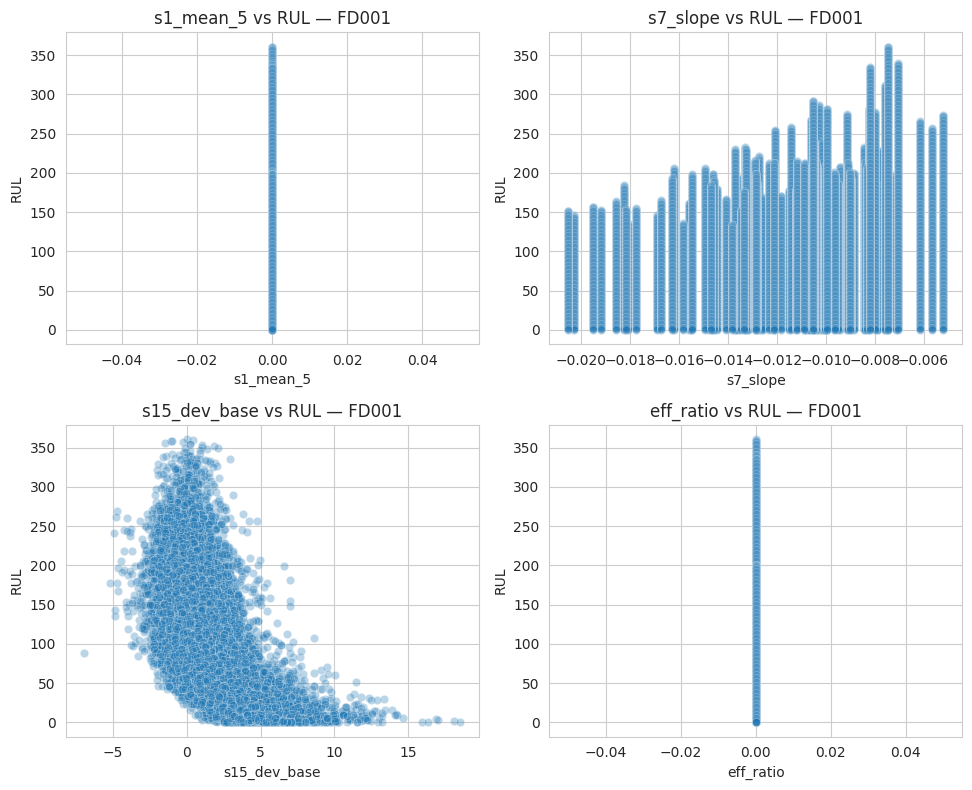

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


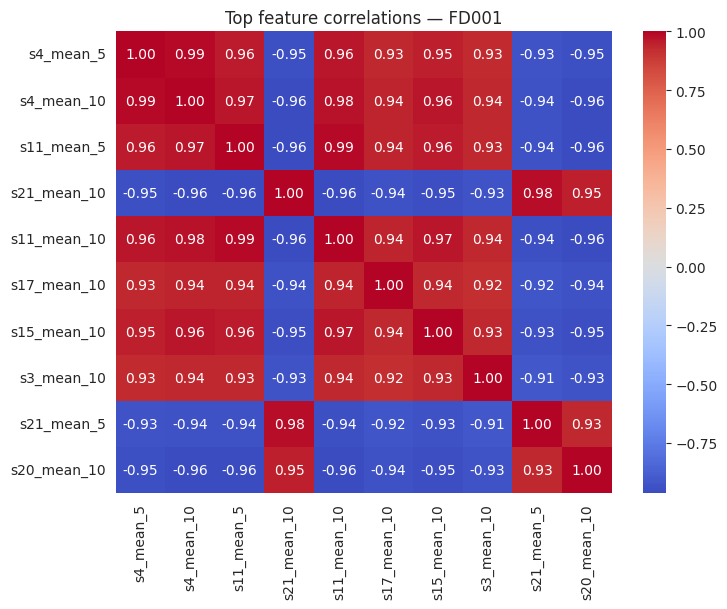

Top features by correlation with RUL:
s4_mean_5      0.732976
s4_mean_10     0.732868
s11_mean_5     0.732275
s21_mean_10    0.729701
s11_mean_10    0.728727
s17_mean_10    0.728268
s15_mean_10    0.727228
s3_mean_10     0.726007
s21_mean_5     0.724072
s20_mean_10    0.723255
dtype: float64


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fd = "FD001"
X_tr = pd.read_csv(f"features_nasa/X_train_{fd}.csv")
y_tr = pd.read_csv(f"features_nasa/y_train_{fd}.csv").squeeze()

# 散点图例子
feats = ["s1_mean_5", "s7_slope", "s15_dev_base", "eff_ratio"]
plt.figure(figsize=(10,8))
for i, feat in enumerate(feats, 1):
    if feat in X_tr.columns:
        plt.subplot(2,2,i)
        sns.scatterplot(x=X_tr[feat], y=y_tr, alpha=0.3)
        plt.xlabel(feat); plt.ylabel("RUL"); plt.title(f"{feat} vs RUL — {fd}")
plt.tight_layout()
plt.show()

# 相关性与 top 特征
corr = X_tr.corrwith(y_tr).abs().sort_values(ascending=False)
top = corr.head(10).index.tolist()
plt.figure(figsize=(8,6))
sns.heatmap(X_tr[top].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Top feature correlations — {fd}")
plt.show()

print("Top features by correlation with RUL:")
print(corr.head(10))


#### Cell 5：跨子集可视化比较

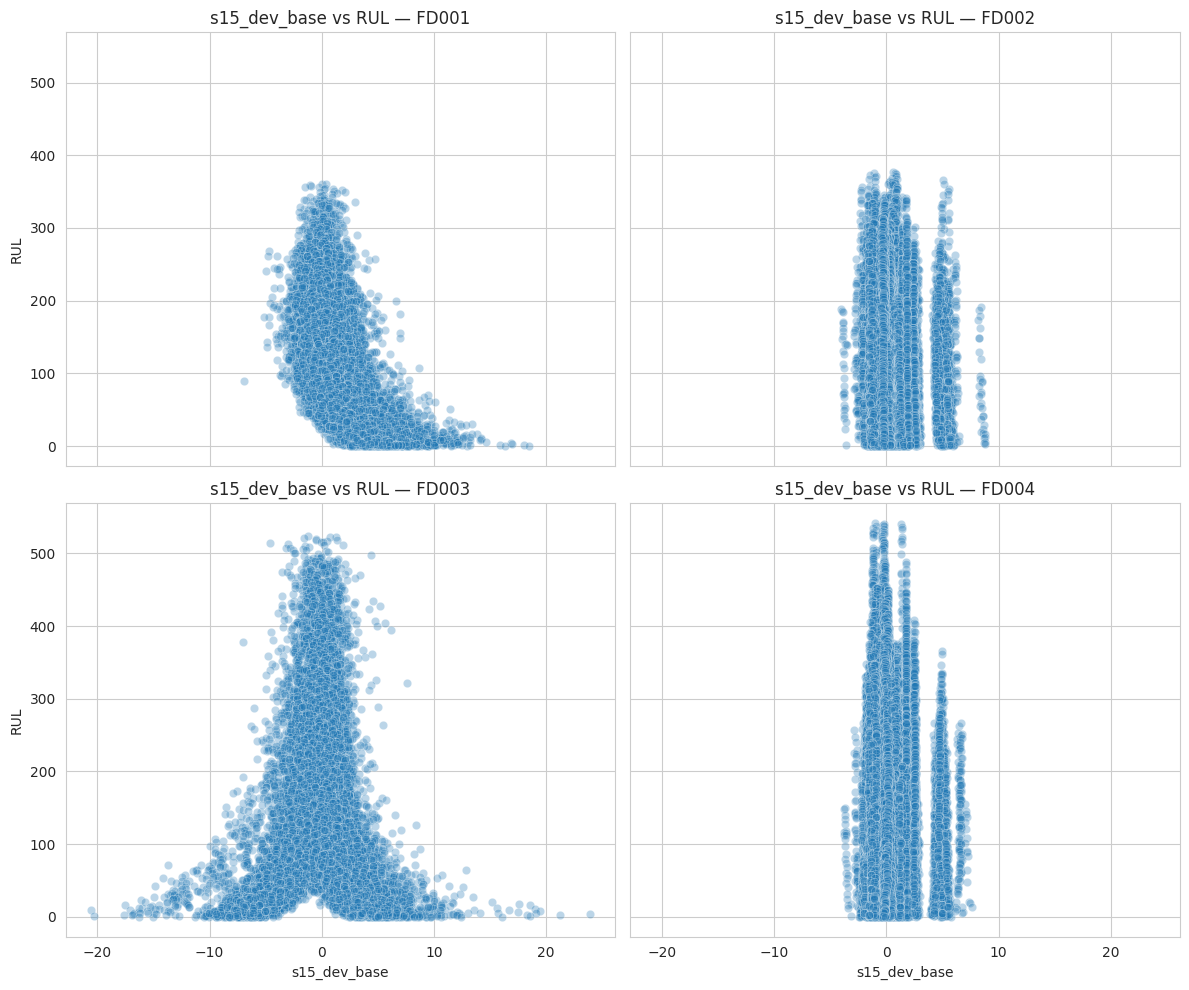

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

feat = "s15_dev_base"
fig, axes = plt.subplots(2,2, figsize=(12,10), sharex=True, sharey=True)
axes = axes.flatten()
for i, fd in enumerate(["FD001","FD002","FD003","FD004"]):
    X_tr = pd.read_csv(f"features_nasa/X_train_{fd}.csv")
    y_tr = pd.read_csv(f"features_nasa/y_train_{fd}.csv").squeeze()
    ax = axes[i]
    if feat in X_tr.columns:
        sns.scatterplot(x=X_tr[feat], y=y_tr, alpha=0.3, ax=ax)
    ax.set_xlabel(feat); ax.set_ylabel("RUL"); ax.set_title(f"{feat} vs RUL — {fd}")
plt.tight_layout()
plt.show()


#### Cell 6：趋势线 + 回归 + 残差标注


/usr/local/lib/python3.12/dist-packages/numpy/lib/_polynomial_impl.py:657: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


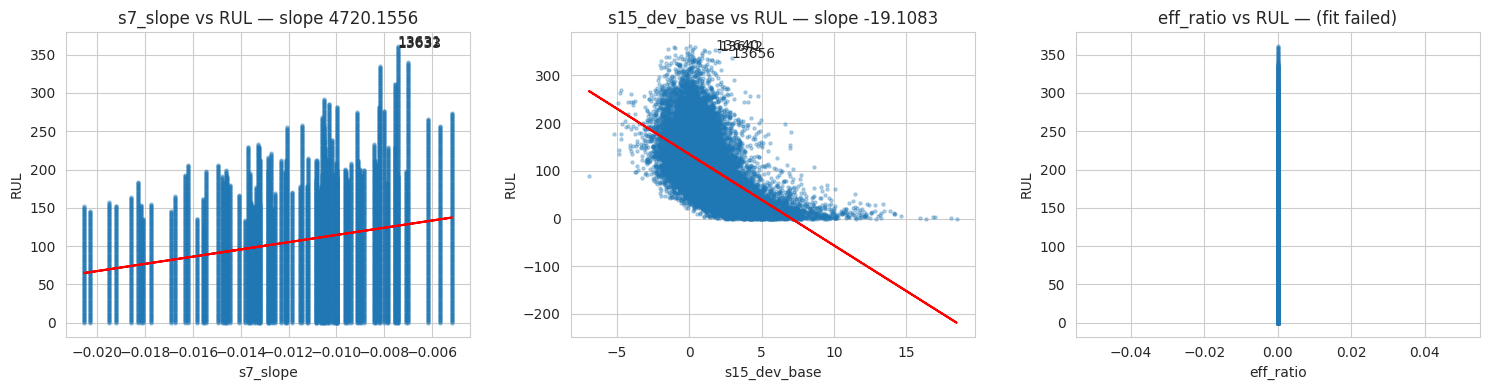

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_with_regression(xs, ys, feat, ax=None):
    mask = xs.notna() & ys.notna() & np.isfinite(xs) & np.isfinite(ys)
    xs2 = xs[mask]
    ys2 = ys[mask]
    if ax is None:
        _, ax = plt.subplots()
    ax.scatter(xs, ys, alpha=0.3, s=5)
    ax.set_xlabel(feat); ax.set_ylabel("RUL")
    if len(xs2) < 2:
        ax.set_title(f"{feat} vs RUL — insufficient data for fit")
        return ax

    try:
        coeff = np.polyfit(xs2, ys2, 1)
        preds = np.polyval(coeff, xs2)
        ax.plot(xs2, preds, color='red')
        ax.set_title(f"{feat} vs RUL — slope {coeff[0]:.4f}")
        residuals = np.abs(ys2 - preds)
        # 标注残差最大的点（但注意索引要对应原 xs2 的位置或改用 enumerate）
        top3 = residuals.nlargest(3).index  # 这是相对于 xs2 的 index
        for idx in top3:
            ax.annotate(str(idx), (xs2.iloc[idx], ys2.iloc[idx]))
    except Exception as e:
        print(f"Warning: polyfit failed for feature {feat}: {e}")
        ax.set_title(f"{feat} vs RUL — (fit failed)")
    return ax


# 举例 FD001
fd = "FD001"
X_tr = pd.read_csv(f"features_nasa/X_train_{fd}.csv")
y_tr = pd.read_csv(f"features_nasa/y_train_{fd}.csv").squeeze()

fig, axes = plt.subplots(1,3, figsize=(15,4))
for ax, feat in zip(axes, ["s7_slope", "s15_dev_base", "eff_ratio"]):
    if feat in X_tr.columns:
        plot_with_regression(X_tr[feat], y_tr, feat, ax=ax)
plt.tight_layout()
plt.show()


#### Cell 4: Run Feature Engineering + Save CSV

### Amelia's notes for pre-processing the NASA dataset
**RQ2: Can the failure of a mechanical system be predicted based on the manufacturing quality of the internal components within it?**
* inspect whether there is a link between manufacturing quality and frequency of failure within a mechanical system

Manufacturing quality can be inferred from how each engine behaves at the start of life and how quickly it degrades relative to others. Thus, our advanced data pre-processing should be focused on extracting features that represent each engines inherent condition and comparing them with how long it lasts (RUL).

Possible steps for feature extraction:


1. Computing the mean sensor readings from each engine's initial cycles.

    - Initial cycles should be considerd as roughly the first 5-10 cycles
    - Mean sensor readings act as a **baseline** for each engine unit: they capture variations caused by manufactoring or assembly differences
2. For each sensor, then measure the deviaton from that engine's baseline.
    - Any deviations will help to isolate degradation relative to the initial quality of the engine (therefore meaning that our ML models can differentiate a normal reading from an abnormal reading for any specific engine unit)
3. Define some early-life window (~20% through an engine's lifespan) and compute a slope (per engine unit) for key sensors to measure intial degradation rates.  
    - These rates will measure how robust each engine's components are.
      * E.g., high slopes = fast change, therefore indicating poor manufactoring quality

4. Compute some health efficiency ratios (assuming that manufactoring defects will manifest as inefficiency in energy conversion) *See end section for further notes on features selected to calculate these ratios*
    - pressure ratio → P30/P2: $(\dfrac{total\ pressure\ at\ HPC\ outlet}{pressure\ at\ fan\ inlet})$

    - temp ratio → T30/T24:$(\dfrac{total\ temperature\ at\ HPC\ outlet}{total\ temperature\ at\ LPC\ outlet})$

    - ∴ efficiency = $(\dfrac{pressure\ ratio}{temp\ ratio})$

5. Compare lifetime & degradation features with each engine unit's RUL to inspect whether engines with worse baselines fail earlier
    - At unit level this includes initial efficiency, initial temperature ratio & initial motor current
      * *models built per time-step/cycle should include these as static features repeated for that engine unit: assumption that they represent inherent quality*



---
#### Ratio calculation notes (for step 4)
  <span style="color: #FF0000;">*Please review this!! I'm not certain of how true this is!!*</span>

  **air-flow stages in a turbofan jet engine:**
  1. Fan (low pressure section): brings in large volumes of air
  2. Low-pressure compressor (LPC): compresses air moderately
  3. High-pressure compressor (HPC): compresses air further before combustion
  4. Combustor: mixes compressed air w/fuel and ignites it
  5. Turbines: extracts power to drive the compressors and fan

**P30/P2**, where:

→ P2 = pressure at fan inlet ⇒ ambient intake conditions

→ P30 = pressure at HPC outlet ⇒ pressure just before the combustor

P30/P2 ratio acts as a proxy for overall compressor pressure, and hence is a direct measure of compressor performance and efficiency:
* as compressor degrades its ability to raise the pressure drops
* subsequently P30/P2 gradually declines

**T30/T24**, where:

→ T24 = temp at LPC outlet ⇒ air after the first stage of compression

→ T30 = temp at HPC outlet ⇒ air just before the combustor

T30/T24 ratio approximates the temperature rise across the HPC, therefore mirroring how much work the HPC is doing
* as the compressor loses efficiency its temperature rise across those stages changes
    - rise: more work is needed for the same compression ratio


**(P30/P2)/(T30/T24)**

The pressure & temperature ratios together capture the compressor's "thermodynamic signature"

→ P30/P2 = pressure efficiency

→ T30/T24 = temperature efficiency/work requirement










# **MODEL TRAINING FOR METRO**
HERE IS THE CODE FOR TRAINING THE SVM NEEDS BETTER COMMENTS
DO NOT RUN DEDICATED TRAINING BLOCK WILL TAKE A LONG WHILE
DO RUN PREPARATION BLOCK

preparation block

In [ ]:
import pandas as pd
import json
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("C:/Users/ej/PycharmProjects/Assignment2/.venv/Scripts/FINALDATA.csv")
#SPLITTING THE DATA USING FAILURE INDEXES (THESE FAILURE INDEXES ARE DIFFERENT BY 30K as they were dropped from the previous dataset)
failureindex1 = [63761,65204]
failureindex2 = [110123,110517]
failureindex3 = [118468,121354]
failureindex4 = [165182,165453]
#this data will roughly follow a 75-20-5 train-test-validation split  due to the underlying issues with the limited occurances of 'failures' (i.e target variable)
# COULD USE TRADITIONAL AS CUMMULATIVE SCORE INCLUDES PAST HISTORY?????
df_train1 = df.iloc[0:110517]
df_test = df.iloc[121355:165453]
df_train5 = df.iloc[110518:121354]
df_train2 = df.iloc[165454:-1]
df_train3 = df.iloc[0:65204]
df_train4 = df.iloc[65205:110517]
df_validation =  df_train5


df_train = pd.concat([df_train1, df_train2], ignore_index=True)


########training
featureset2 = ["power_temp_ratio","flicker",'compressor_eff','reserviour_flowrate']
featureset1 = ['cum_PTratio','cum_reserviourrate','cum_compressor_eff','cum_flicker']
featuresetall = ["power_temp_ratio","flicker",'compressor_eff','reserviour_flowrate','cum_PTratio','cum_reserviourrate','cum_compressor_eff','cum_flicker']
X1_train = df_train[featureset1]
Y1_train = df_train["Failure"]

X1_test = df_train[featureset1]
Y1_test = df_train["Failure"]

X=df_train[featuresetall]
y1=df_train["Failure"]
y2=df_train["Weeks2Failure"]

##Sorting features based on Mutual information

mi_scores_failure = mutual_info_classif(X, y1, discrete_features=False, random_state=42)
mi_scores_weeks = mutual_info_classif(X, y2, discrete_features=False, random_state=42)

mi_df_failure = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores_failure})
mi_df_weeks = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores_weeks})

mi_df_failure = mi_df_failure.sort_values(by='MI Score', ascending=False)
mi_df_weeks = mi_df_weeks.sort_values(by='MI Score', ascending=False)

print("Mutual Information Scores for Features (FAILURE):")
print(mi_df_failure)

print("Mutual Information Scores for Features(weeks):")
print(mi_df_weeks)
###
print("TOP FEATURES FAILURE")
print(mi_df_failure["Feature"].iloc[:4])

print("TOP FEATURES WEEKS")
print(mi_df_weeks["Feature"].iloc[:4])
# STRATIFICATION CHECKING
# MODIFY THESE IF WISH TO HOLD OUT DIFFERENT SET
df_notvalidation = pd.concat([df_train3, df_train5, df_test, df_train2], ignore_index=True)
df_validation = df_train4
x_strat = df_notvalidation[featuresetall]
y_strat = df_notvalidation["Failure"]
y_strat_week = df_notvalidation["Weeks2Failure"]



X_strat_train, X_strat_test, y_strat_train,y_strat_test = train_test_split(x_strat, y_strat, test_size=0.2, random_state=42, stratify=y_strat)

X_strat_train_failure, X_strat_test_failure, y_strat_train_failure, y_strat_test_failure = X_strat_train, X_strat_test, y_strat_train,y_strat_test


X_strat_train_week, X_strat_test_week, y_strat_train_week,y_strat_test_week = train_test_split(x_strat, y_strat_week, test_size=0.2, random_state=42, stratify=y_strat_week)


featureset_MI_failure_top4 = mi_df_failure["Feature"].iloc[0:4]
featureset_MI_weeks_top4 = mi_df_weeks["Feature"].iloc[0:4]


X_weeks_train = X_strat_train_week[featureset_MI_weeks_top4]
X_weeks_test = X_strat_test_week[featureset_MI_weeks_top4]

Y_weeks_train = y_strat_train_week
Y_weeks_test = y_strat_test_week

X_failure_train = X_strat_train_failure[featureset_MI_failure_top4]
X_failure_test = X_strat_test_failure[featureset_MI_failure_top4]

Y_failure_train = y_strat_train_failure
Y_failure_test = y_strat_test_failure

#constructing validation data
x_valid_week = df_validation[featureset_MI_weeks_top4]
y_valid_week = df_validation["Weeks2Failure"]

x_valid_failure = df_validation[featureset_MI_failure_top4]
y_valid_failure = df_validation["Failure"]

# **SVM TRAINING**
must run prep block
(WARNING WILL TAKE A VERY LONG TIME TO RUN SVM TRAINING)

In [ ]:

accuracy_list = []
C_value_list = []


for i in range (10):
    C_val=0.1+i/10
    C_value_list.append(C_val)
    svm_model_tuning = SVC(kernel='linear', C=C_val, random_state=42,class_weight='balanced')
    svm_model_tuning.fit(X_weeks_train, Y_weeks_train)
    Y_pred = svm_model_tuning.predict(X_weeks_test)
    accuracy = accuracy_score(Y_weeks_test,Y_pred)
    accuracy_list.append(1-accuracy)

print(accuracy_list)
plt.plot(C_value_list, accuracy_list)
plt.xlabel("C values")
plt.ylabel("Error Rate")
plt.title("Error Rate vs C")
plt.savefig("HyperParameterTuningWeeks")
plt.close()

# NOW DO FAILURE
accuracy_list_2 = []
C_value_list_2 = []
for i in range (10):
    C_val=0.1+i/10
    C_value_list_2.append(C_val)
    svm_model_tuning = SVC(kernel='linear', C=C_val, random_state=42,class_weight='balanced')
    svm_model_tuning.fit(X_failure_train, Y_failure_train)
    Y_pred = svm_model_tuning.predict(X_failure_test)
    accuracy = accuracy_score(Y_failure_test, Y_pred)
    accuracy_list_2.append(1-accuracy)
print(accuracy_list_2)
plt.plot(C_value_list_2, accuracy_list_2)
plt.xlabel("C values")
plt.ylabel("Error Rate")
plt.title("Error Rate vs C")
plt.savefig("HyperParameterTuningFailure")

# **kNN Training**
MUST RUN PREP BLOCK


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_list = []
error_scores = []
for i in range(1,21):
    kNN_weeks = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    kNN_weeks.fit(X_weeks_train, Y_weeks_train)
    Y_pred = kNN_weeks.predict(X_weeks_test)
    accuracy = accuracy_score(Y_weeks_test, Y_pred)
    error_scores.append(1-accuracy)
    k_list.append(i)

print(error_scores)
plt.plot(k_list, error_scores)
plt.xlabel("k values")
plt.ylabel("Error Rate")
plt.title("Error Rate vs k")
plt.savefig("HyperParameterTuningWeeks_kNN.png")
plt.close()

error_scores2 = []
k_list2 = []
for i in range(1,21):
    kNN_failure = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    kNN_failure.fit(X_failure_train, Y_failure_train)
    Y_pred = kNN_failure.predict(X_failure_test)
    accuracy = accuracy_score(Y_failure_test, Y_pred)
    error_scores2.append(1-accuracy)
    k_list2.append(i)

plt.plot(k_list2, error_scores2)
plt.xlabel("k values")
plt.ylabel("Error Rate")
plt.title("Error Rate vs k")
plt.savefig("HyperParameterTuningFailure_kNN.png")
plt.close()

## BEST VALUES ARE 6 FOR BOTH

kNN_best_weeks = KNeighborsClassifier(n_neighbors=6, n_jobs=-1)
kNN_best_failure = KNeighborsClassifier(n_neighbors=6, n_jobs=-1)

###kNN for weeks
kNN_best_weeks.fit(X_weeks_train, Y_weeks_train)
Y_pred = kNN_best_weeks.predict(X_strat_validation_week)


confusion_matrix_kNN_week = confusion_matrix(y_strat_validation_week, Y_pred)
sns.heatmap(confusion_matrix_kNN_week, annot=True, fmt="d", cmap="Blues")
plt.title("kNN CONFUSION MATRIX FOR WEEKS")
plt.xlabel("Predicted Label (WEEKS)")
plt.ylabel("True Label (WEEKS)")
plt.savefig("kNN_HEATMAP_BEST_kNN_weeks.png")
plt.close()

##kNN for failure
kNN_best_failure.fit(X_failure_train, Y_failure_train)
Y_pred = kNN_best_failure.predict(X_strat_validation_failure)

confusion_matrix_kNN_failure = confusion_matrix(y_strat_validation_failure, Y_pred)
sns.heatmap(confusion_matrix_kNN_failure, annot=True, fmt="d", cmap="Blues")
plt.title("kNN CONFUSION MATRIX FOR FAILURE")
plt.xlabel("Predicted Label (Y/N)")
plt.ylabel("True Label (Y/N)")
plt.savefig("kNN_HEATMAP_BEST_kNN_failure.png")
plt.close()

# **Decision Tree Training**
must run prep block first

In [ ]:
from sklearn.tree import DecisionTreeClassifier
error_scores = []
error_scores_valid = []
depth_list = []
for i in range(3,13):
    depth = i
    depth_list.append(depth)
    dt_weeks =  DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_weeks = dt_weeks.fit(X_weeks_train, Y_weeks_train)
    Y_pred = dt_weeks.predict(X_weeks_test)
    accuracy = accuracy_score(Y_weeks_test, Y_pred)
    #now do validation check
    Y_valid_pred = dt_weeks.predict(x_valid_week)
    accuracy_valid = accuracy_score(y_valid_week, Y_valid_pred)
    # append scores
    error_scores.append(1-accuracy)
    error_scores_valid.append(1-accuracy_valid)

    plt.plot(depth_list, error_scores, label='Training')
    plt.plot(depth_list, error_scores_valid, label='Validation')
    plt.xlabel("Decision Tree Depth")
    plt.ylabel("Error Score")
    plt.title("Error Scores vs Decision Tree Depth")
    plt.legend()
    plt.savefig("DT_Weeks_TUNING")
    plt.close()

    #
error_scores2 = []
error_scores2_valid=[]
depth_list2 = []
for i in np.arange(3,33):
    depth = i
    depth_list2.append(depth)
    dt_failure = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_failure = dt_failure.fit(X_failure_train, Y_failure_train)
    Y_pred = dt_failure.predict(X_failure_test)
    accuracy = accuracy_score(Y_failure_test, Y_pred)

    #Now do validation check
    Y_valid_pred = dt_failure.predict(x_valid_failure)
    accuracy_valid = accuracy_score(y_valid_failure, Y_valid_pred)
    #append variables to lists
    error_scores2.append(1-accuracy)
    error_scores2_valid.append(1-accuracy_valid)



plt.plot(depth_list2, error_scores2, label='Training')
plt.plot(depth_list2, error_scores2_valid, label = 'Validation')
plt.xlabel("Decision Tree Depth")
plt.ylabel("Error Score")
plt.title("Error Scores vs Decision Tree Depth")
plt.legend()
plt.savefig("DT_Failure_TUNING")

# FOUND FOR FAILURE DEPTH = 10 was best, FOR WEEKS DEPTH = 7 was best

#now look what happens if we train 20 models for each with each having progressively more data (5% each) with optimal parameters?
#DO FOR WEEKS
y_strat_failure = y_strat

training_accuracy =[]
validation_accuracy = []

for i in range(1,101):
    x_used, unused1, y_used, unused2 = train_test_split(x_strat, y_strat_failure, test_size=1.009-0.01*i,random_state=42, stratify=y_strat_failure)
    x_train , x_test, y_train, y_test = train_test_split(x_used[featureset_MI_failure_top4], y_used, test_size=0.2,random_state=42, stratify=y_used)

    dt_model_progressive = DecisionTreeClassifier(max_depth=10, random_state=42)
    dt_model_progressive.fit(x_train, y_train)
    y_test_pred = dt_model_progressive.predict(x_test)
    y_valid_pred = dt_model_progressive.predict(x_valid_failure)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    valid_accuracy = accuracy_score(y_valid_failure, y_valid_pred)
    training_accuracy.append(test_accuracy)
    validation_accuracy.append(valid_accuracy)

percentlist = range(1,101)

plt.plot(percentlist, training_accuracy, label='Training')
plt.plot(percentlist, validation_accuracy, label='Validation')
plt.xlabel("Decision Tree accuracy over % instances")
plt.ylabel("Accuracy Score")
plt.ylim([0,1.05])
plt.title("Accuracy vs % instances")
plt.legend()
plt.savefig("DT_AccuracyVSINSTANCES_TUNING_FAILURE")
plt.close

training_accuracy =[]
validation_accuracy = []

for i in range(1,101):
    x_used, unused1, y_used, unused2 = train_test_split(x_strat, y_strat_week, test_size=1.009-0.01*i,random_state=42, stratify=y_strat_week)
    x_train , x_test, y_train, y_test = train_test_split(x_used[featureset_MI_weeks_top4], y_used, test_size=0.2,random_state=42, stratify=y_used)

    dt_model_progressive = DecisionTreeClassifier(max_depth=7, random_state=42)
    dt_model_progressive.fit(x_train, y_train)
    y_test_pred = dt_model_progressive.predict(x_test)
    y_valid_pred = dt_model_progressive.predict(x_valid_week)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    valid_accuracy = accuracy_score(y_valid_week, y_valid_pred)
    training_accuracy.append(test_accuracy)
    validation_accuracy.append(valid_accuracy)

percentlist = range(1,101)

plt.plot(percentlist, training_accuracy, label='Training')
plt.plot(percentlist, validation_accuracy, label='Validation')
plt.xlabel("Decision Tree accuracy over % instances")
plt.ylabel("Accuracy Score")
plt.ylim([0,1.05])
plt.title("Accuracy vs % instances")
plt.legend()
plt.savefig("DT_AccuracyVSINSTANCES_TUNING_WEEKS")